In [1]:
import Pkg; Pkg.activate("../"); Pkg.instantiate()

  Activating project at `~/Kaleb_Data/PhD_Research/mEclares`
Precompiling project...
  ? Convex


In [2]:
using LinearAlgebra
using BlockDiagonals
using ForwardDiff
using ControlSystems
using ComponentArrays
using Parameters: @unpack
using StaticArrays
using Plots

In [3]:
# include dependencies
include("../src/utils.jl")
include("../src/ExpDynamicsLibrary.jl")
include("../src/RefTrajectoryLibrary.jl")
include("../src/ExpControllerLibrary.jl")
include("../src/Visualization.jl")
include("../src/RefTrajectoryLibrary.jl")

Precompiling Convex
        Info Given Convex was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Convex
[ Info: Precompiling Convex [f65535da-76fb-5f13-bab9-19810c17039a]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Convex [f65535da-76fb-5f13-bab9-19810c17039a].


Main.RefTrajLib

In [4]:
include("../src/ExpmeSchFlylab_3.jl")

Main.meSchExpDIFL

In [5]:
## Testing meSch

# Initial state
soc_init = 90.0
N = 1.0
int_pos_1 = [-2.0; 0.0; 0.0]
int_pos_2 = [1.0; 0.0; 0.0]
int_pos_3 = [-0.5; -3.2; 0.0]


# Get the quad_parameters
quad_p = ExpDyn.quadrotor_parameters

## Define the quad's initial condition
quad1_ic = ComponentArray(
    x = int_pos_1,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

quad2_ic = ComponentArray(
    x = int_pos_2,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

quad3_ic = ComponentArray(
    x = int_pos_3,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

discharge_rate = 0.6667
T_SIM = 300.0

quad_ic = ComponentArray(
    quad1 = quad1_ic,
    quad2 = quad2_ic,
    quad3 = quad3_ic,
)

# params = meSchExpDI.simulate(quad_states, 0., T_SIM, discharge_rate)
sol_nc, params = meSchExpDIFL.simulate(quad_ic, 0., T_SIM, discharge_rate)
X1 = sol_nc.u;
# T = sol_nc.t;
# println("size of state vecs: $(size(sol_nc.u))")
# println("size of state vecs: $(size(sol_nc.t))")

=========== In recompute_committed ==============
Current time: 0.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 90.0
current_soc: 90.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 90.0
current_soc: 90.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 90.0
current_soc: 90.0
Remaining flight time 1st quad: 134.99325033748315
Remaining flight time: 134.99325033748315
TC: 12.900000000000002
TF - TC > k(T_c + T_delta): 122.09325033748314 > 51.0
Expected gap: 71.09325033748314
Gap satisfied: true
Remaining flight time: 134.99325033748315
TC: 12.900000000000002
TF - TC > k(T_c + T_delta): 122.09325033748314 > 26.0
Expected gap: 96.09325033748314
Gap satisfied: true
current time: 0.0
GAP FLAG: false
=========== Out recompute_committed ==============
=========== In recompute_

In [6]:
params[1].nom_traj.xs;

In [7]:
sol_nc.u[10].quad3.soc

89.98175382067019

In [8]:
include("../src/RefTrajectoryLibrary.jl")

Main.RefTrajLib

In [9]:
#Set up visualization
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo:Quadrotor

vis = Visualizer()
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8700


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), Set{Any}(), ip"127.0.0.1", 8700))

In [12]:
# [Trajectories] Create and Visualize the reference trajectories
include("../src/RefTrajectoryLibrary.jl")
include("../src/Visualization.jl")
# For Quad 1
t0 = 0.
N = 1200
traj_type = 1
dt = 0.05

# Draw first trajectory
Xref_1, Uref1 = RefTrajLib.get_desired_trajectory(t0, traj_type, N, dt, 1); # The last argument is for the param type
Xref_2, Uref2 = RefTrajLib.get_desired_trajectory(t0, traj_type, N, dt, 2); # The last argument is for the param type
Xref_3, Uref3 = RefTrajLib.get_desired_trajectory(t0, traj_type, N, dt, 3); # The last argument is for the param type
Visualization.vis_traj!(vis, 1, :traj_1, Xref_1[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 0.0, 0.0, 2.5))
Visualization.vis_traj!(vis, 1, :traj_2, Xref_2[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 1.0, 0.0, 2.5))
Visualization.vis_traj!(vis, 1, :traj_3, Xref_3[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 0.0, 1.0, 2.5))

In [30]:
# setobject!(vis, HyperRectangle(Vec(0., 0, 0), Vec(1., 1, 1)), MeshCat.MeshPhongMaterial(color = MeshCat.RGBA(0.0,1.0,0.0,0.2)))
# settransform!(vis, MeshCat.Translation(-0.5, -0.5, 0))
# # setprop!(vis, "material.opacity", 0.5)  # Correct usage of setprop!

### Draw Bounds

In [10]:
X_bound = [[-3.60, -4.80, 1.0],
            [0.0, -4.80, 1.0],
            [2.40, -4.80, 1.0],
            [2.40, 0.0, 1.0],
            [2.40, 1.80, 1.0],
            [0.0, 1.80, 1.0],
            [-3.60, 1.80, 1.0],
            [-3.40, -1.40, 1.0]]

# Generate 100 values for z from 0 to 2.0
z_values = range(0, stop=8.0, length=400)

# Generate the 500-element vector (each with 100 points)
points = [[x, y, z] for (x, y, _) in X_bound for z in z_values];

Visualization.vis_traj!(vis, 2, :lab_bound, points; R = 0.01, color = MeshCat.RGBA(0.0, 1.0, 0.0, 2.5))

In [11]:
# [Quadrotors] Visualize the Quadrotors
Visualization.N_animate_system_geometric!(vis, X1, 3, 0.01)

# PLots 

In [86]:
charge_dist_1 = params[1].charge_dist
charge_dist_2 = params[2].charge_dist
charge_dist_3 = params[3].charge_dist;

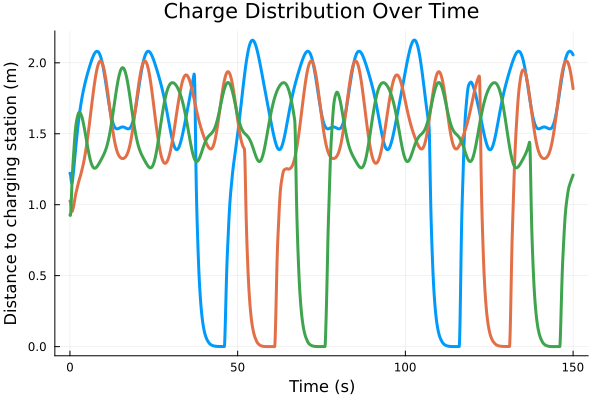

In [95]:
# Extract charge distributions
charge_dists = [params[i].charge_dist for i in 1:3]

# Total duration
total_time = 150

# Create a plot
plot()

# Plot each charge distribution with time on the x-axis
for i in 1:3
    num_points = length(charge_dists[i])
    time = range(0, total_time, length=num_points)  # Create time vector
    plot!(time, charge_dists[i], linewidth=3, label="")
end

# Show the plot
xlabel!("Time (s)")
ylabel!("Distance to charging station (m)")
title!("Charge Distribution Over Time")
display(plot!())

In [96]:
savefig("charge_dist.svg")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/charge_dist.svg"

In [97]:
savefig("charge_dist.png")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/charge_dist.png"

In [98]:
soc_values_1 = [sol_nc.u[i].quad1.soc for i in eachindex(sol_nc.u)]
soc_values_2 = [sol_nc.u[i].quad2.soc for i in eachindex(sol_nc.u)]
soc_values_3 = [sol_nc.u[i].quad3.soc for i in eachindex(sol_nc.u)];

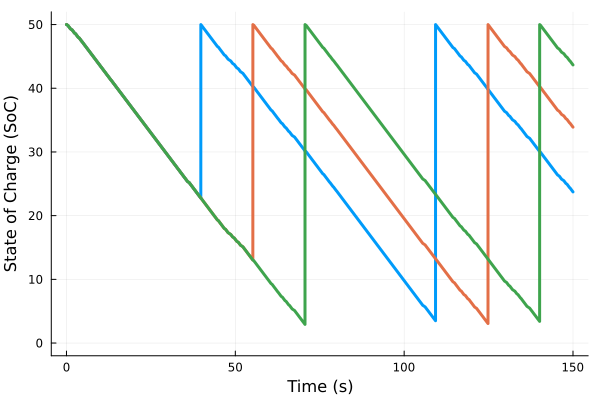

In [105]:
# Create time vector
num_points = length(soc_values_1)  # Assuming all soc_values have the same length
time = range(0, total_time, length=num_points)

# Create a plot
plot()

# Plot SOC values with customized appearance
plot!(time, soc_values_1, linewidth=3, label="")
plot!(time, soc_values_2, linewidth=3, label="")
plot!(time, soc_values_3, linewidth=3, label="")

# Set axis labels, title, and y-axis limits
xlabel!("Time (s)")
ylabel!("State of Charge (SoC)")
# title!("SOC Evolution Over Time")
ylims!(-2, 52)  # Set y-axis limits from 0 to 50

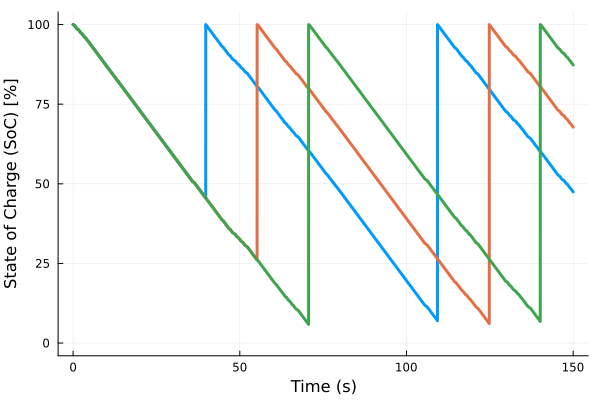

In [106]:
# Total duration
total_time = 150

# Create time vector
num_points = length(soc_values_1)  # Assuming all soc_values have the same length
time = range(0, total_time, length=num_points)

# Convert SoC values to percentage
soc_percentage_1 = soc_values_1 .* 2
soc_percentage_2 = soc_values_2 .* 2
soc_percentage_3 = soc_values_3 .* 2

# Create a plot
plot()

# Plot SOC percentages with customized appearance
plot!(time, soc_percentage_1, linewidth=3, label="")
plot!(time, soc_percentage_2, linewidth=3, label="")
plot!(time, soc_percentage_3, linewidth=3, label="")

# Set axis labels, title, and y-axis limits
xlabel!("Time (s)")
ylabel!("State of Charge (SoC) [%]")  # SoC in percentage
ylims!(-4, 104)  # Set y-axis limits from 0 to 100%


In [107]:
# Save as SVG
savefig("soc_percentage_evolution.svg")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/soc_percentage_evolution.svg"

In [108]:
# Save as PNG
savefig("soc_percentage_evolution.png")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/soc_percentage_evolution.png"